## Name:- Pawar Akash Babu

# Prediction Using UnSupervised Machine Learning.

## TASK 2 : ***Predict the Optimum number of clusters and***                  
   ## ***Represent it visually***

### Here we will use K-Means Clustering Technique.

### Importing required libraries and reading data.

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt


# Loading iris dataset
df = pd.read_csv("C:/Users/HP/Desktop/TSF/Neeyati/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Removing Unnecessary columns

In [3]:
iris = df.drop(['Id'],axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris.duplicated().sum()

3

In [6]:
# Removing duplicate values
cleaniris = iris.drop_duplicates()
cleaniris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
cleaniris.describe() # Descriptive Statistics

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


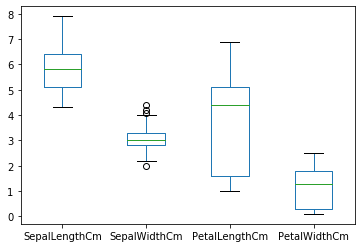

In [8]:
# checking for outliers by plotting boxplot
cleaniris[['SepalLengthCm','SepalWidthCm',
          'PetalLengthCm','PetalWidthCm']].plot.box()

As we can see in the second box plot i.e Sepal width. few outliers are present there.

### Removing Outliers

In [9]:
# Outlier Formula
q3 = cleaniris['SepalWidthCm'].quantile(.75)
q1 = cleaniris['SepalWidthCm'].quantile(.25)
iqr = q3 - q1
iqr

0.5

In [10]:
upperange = q3-1.5*iqr
lowerange = q1-1.5*iqr
upperange

2.55

In [11]:
lowerange

2.05

In [12]:
pureiris = cleaniris[(cleaniris['SepalWidthCm']>lowerange) & 
                     (cleaniris['SepalWidthCm']<upperange)]
pureiris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
41,4.5,2.3,1.3,0.3,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
69,5.6,2.5,3.9,1.1,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor


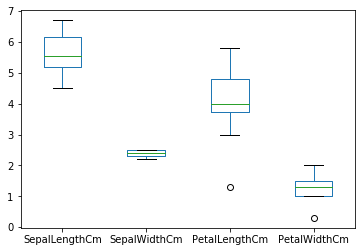

In [13]:
pureiris[['SepalLengthCm','SepalWidthCm',
          'PetalLengthCm','PetalWidthCm']].plot.box()

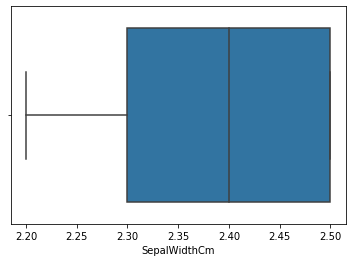

In [13]:
import seaborn as sns
sns.boxplot(data=pureiris, x='SepalWidthCm')

### Predicting the value of k for the model:

In [25]:
# finding the optimum number of clusters for k-means Classification
from sklearn.cluster import KMeans
x = pureiris.iloc[:, [0,1,2,3]].values

k_range = range(1,11)
sse = []              # sum of squares of error(SSE)

for k in k_range:
    km = KMeans(n_clusters = k, init='k-means++',max_iter=300, n_init=10,
               random_state=0)
    km.fit(x)
    sum_of_squares = km.inertia_
    sse.append(sum_of_squares)
print('Sum of Squares from k = 1 to k = 10 are as follows:')
sse

Sum of Squares from k = 1 to k = 10 are as follows:


[26.29166666666667,
 12.58051948051948,
 5.78542857142857,
 3.895238095238094,
 2.7188095238095222,
 1.7033333333333325,
 1.1133333333333324,
 0.8166666666666661,
 0.5509999999999995,
 0.4026666666666663]

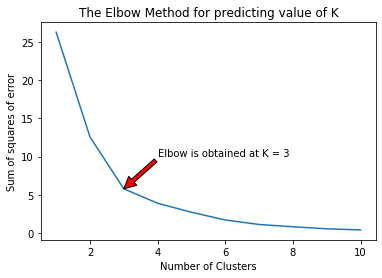

In [16]:

# Finding the optimum number of clusters for k-means classification
x = pureiris.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, it allow us to observe elbow.
plt.plot(k_range, sse)
plt.title('The Elbow Method for predicting value of K')
plt.annotate("Elbow is obtained at K = 3",xytext = (4,10),xy=(3,5.7854),arrowprops={'facecolor':'red'})
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squares of error')
plt.show()

In [24]:
# Applying k-means to the dataset, Creating the K-means classifier.

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

y_kmeans

array([2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

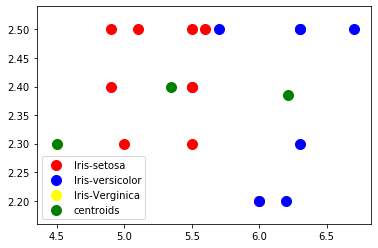

In [23]:
# Visualizing the Clusters.
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s=100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s=100, c='blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],
           s = 100, c = 'yellow', label = 'Iris-Verginica')

# Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'green', label = 'centroids')
plt.legend()

## Conclusion : The Optimum number of Cluster is 3, and it is represented visually above.

### Thank You, The Sparks Foundation.